### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Load and Preprocess the data for Training

In [2]:
train_df = pd.read_excel('Mining-Data.xlsx', sheet_name='My_Training_Data70')
test_df = pd.read_excel('Mining-Data.xlsx', sheet_name='Testing_30')


X_train = train_df.drop('Recovery(%)', axis=1)
y_train = train_df[['Recovery(%)']]
X_test = test_df.drop('Recovery(%)', axis = 1)
y_test = test_df[['Recovery(%)']]

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_train_normalized = scaler_X.fit_transform(X_train)
X_test_normalized = scaler_X.transform(X_test)


y_train_normalized = scaler_Y.fit_transform(y_train)
y_test_normalized = scaler_Y.transform(y_test)

In [3]:
rf_regressor = RandomForestRegressor(n_estimators = 1000, max_depth= 500, random_state = 42)
rf_regressor.fit(X_train_normalized, y_train_normalized)

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=500, n_estimators=1000, random_state=42)

### Get feature importances from the trained model

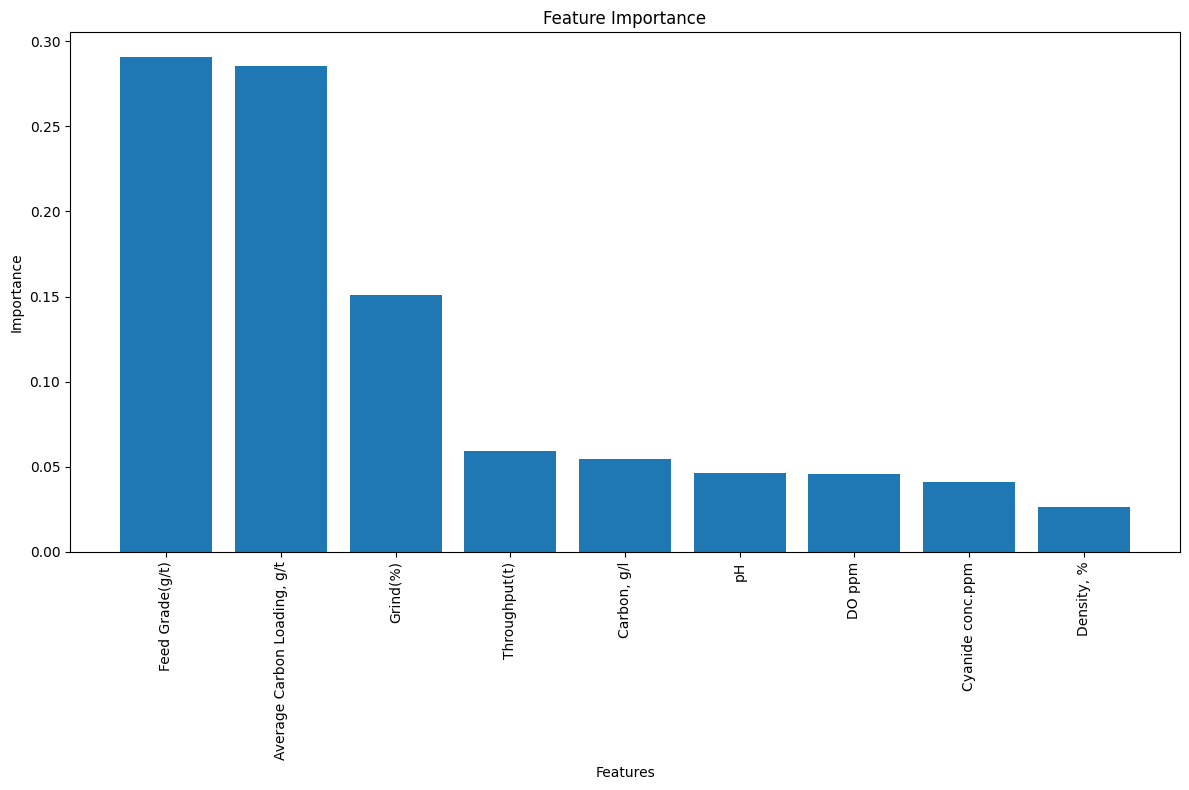

In [4]:
# Get feature importances from the trained model
feature_importances = rf_regressor.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.bar(range(X_train.shape[1]), sorted_feature_importances)
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

## Model Performance Evaluation Using the Test Set

In [5]:
y_pred_scaled = rf_regressor.predict(X_test_normalized)
y_pred = scaler_Y.inverse_transform(y_pred_scaled.reshape(-1,1))

#### Performance metrics not promising at all :(

In [6]:
mse = mean_squared_error(y_test, y_pred)

# Compute the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Compute the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.638229096977143
Mean Absolute Error: 0.6015073869593115
R-squared: 0.31188764229629384


### Random Forest is an ensemble of plenty decision trees thus the tree below:

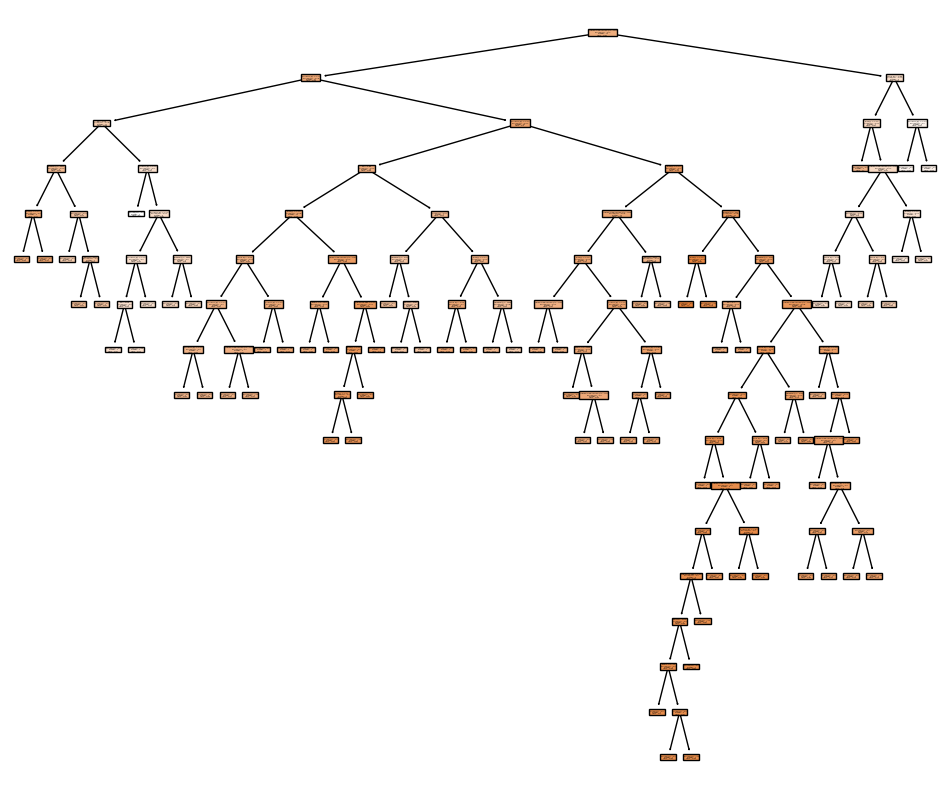

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the first decision tree from the Random Forest
tree = rf_regressor.estimators_[0]

# Visualize the decision tree
plt.figure(figsize=(12, 10))
plot_tree(tree, feature_names=list(X_train.columns), filled=True)
plt.show()

## Compare Predicted values to the Actual values using the trained model

In [11]:
compare_df = pd.DataFrame(y_pred, columns=['Predicted'])
compare_df['actual'] = y_test

In [13]:
compare_df.head(10)

,Predicted,actual
0,90.748614,89.959033
1,90.334749,90.590392
2,90.203208,88.761667
3,89.739661,90.777612
4,90.379583,90.116769
5,90.472148,90.428091
6,90.434670,91.709526
7,89.453536,89.376526
8,90.992580,90.828132
9,90.529480,90.003263


### The plot looks quite promising than the score metrics obtained earlier; ergo meeaning the model does better in its prediction than its training

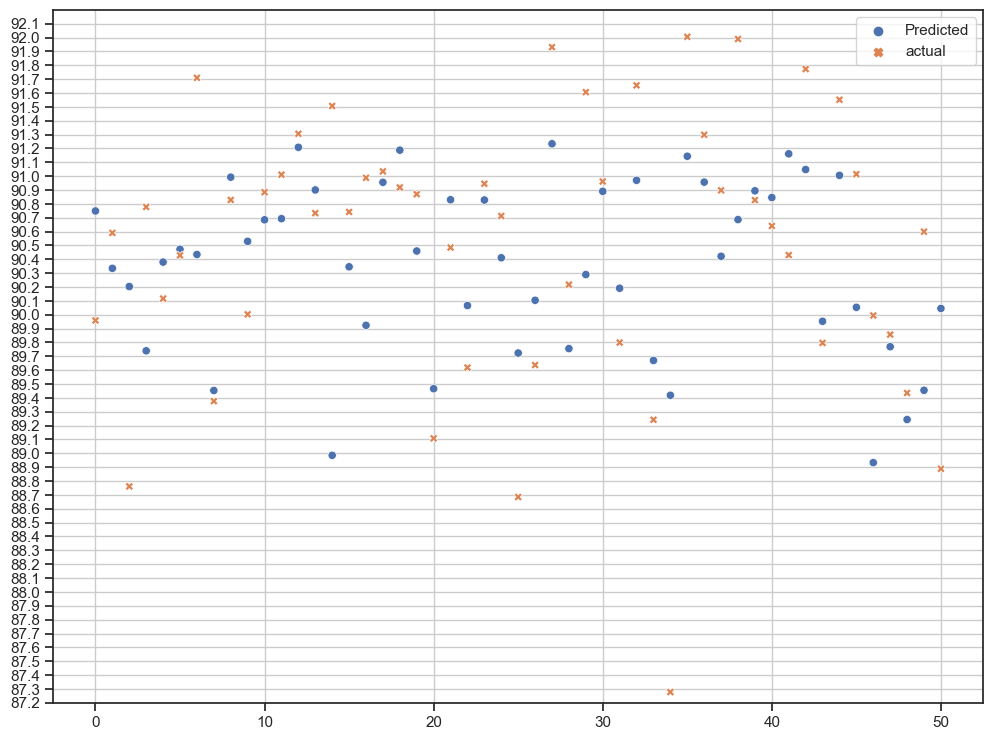

In [18]:
plt.figure(figsize=(12,9))
sns.set(style = 'ticks')

sns.scatterplot(compare_df)
y_ticks = np.arange(87.2, 92.2, 0.1)
plt.ylim(87.2, 92.2)
plt.yticks(y_ticks)
plt.grid(True)